# Analysis 1
- Understanding the data
- Getting total number of questions, duplicate pair of questions, unique questions, number of questions repeating
- Generating charts based on:
    - bar chart on how many times the questions are appearing, character counts and word counts
    - Violin charts for duplicate and non duplicate questions
    - scatter plots and histogram based on the average character count and average words counts in each question
    - bar charts based on word match share for duplicate/ non duplicate questions based on word count and based on sum of their weights. 
    Compare the difference between these 2 charts

In [1]:
#library imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
import os
#getting current working directory
b = os.getcwd()

#reading the csv file
df = pd.read_csv(b+"/"+"Data/questions.csv").fillna("")
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


## Understanding the data

In [3]:
#no of rows and columns the dataset contains
df.shape

(404351, 6)

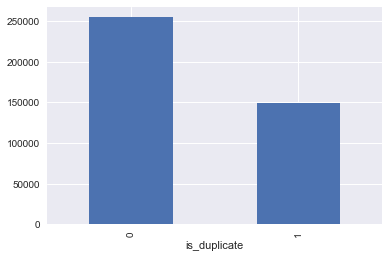

In [4]:
#total number of duplicate pairs of questions present in dataset
df.groupby("is_duplicate")['id'].count().plot.bar()

In [5]:
#getting the summary of data we have
print('Total number of question pairs for testing: {}'.format(len(df)))

#calculating the percentage duplicate question pair we have
print('Duplicate pairs: {}%'.format(round(df['is_duplicate'].mean()*100, 2)))

#creating a list of all the qid provided
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())

#getting a count of unique and repeating questions
print('Total number of unique questions in the data: {}'.format(len(
    np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))


Total number of question pairs for testing: 404351
Duplicate pairs: 36.92%
Total number of unique questions in the data: 789801
Number of questions that appear multiple times: 13698


In [6]:
#creating a list of questions from the dataset
qs_list = pd.Series(df['question1'].tolist() + df['question2'].tolist()).astype(str)

In [7]:
len(qs_list)

808702

In [8]:
#punctuation analysis of the questions
qmarks = np.mean(qs_list.apply(lambda x: '?' in x))
math = np.mean(qs_list.apply(lambda x: '[math]' in x))
fullstop = np.mean(qs_list.apply(lambda x: '.' in x))

#creating a subset of the existing list of questions to get a rough idea of the below counts
#otherwise getting string out of bound error for the below functions
qs_subset = qs_list[0:500000]
capital_first = np.mean(qs_subset.apply(lambda x: x[0].isupper()))
capitals = np.mean(qs_subset.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(qs_subset.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

Questions with question marks: 99.87%
Questions with [math] tags: 0.12%
Questions with full stops: 6.31%
Questions with capitalised first letters: 99.81%
Questions with capital letters: 99.95%
Questions with numbers: 11.70%


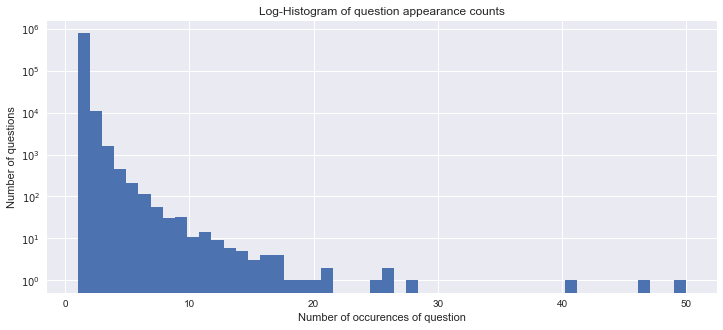

In [9]:
#Histogram plot of how many times the questions are repeating
plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
print()

## Feature Analysis
- derive a few features from the dataset
- character length of questions 1 and 2
- number of words in question 1 and 2
- normalized word share count.
- comparison of the above parameter

In [20]:
#extracting the length of questions and adding this column to the dataset
df['q1len'] = df['question1'].str.len()
df['q2len'] = df['question2'].str.len()

#calculating number of words in each columns
df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

#map function is used to do the operation on all the set of question 1 to get the word count
def normalized_word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2)) #if the word is common then divide by sum and calculate word share


df['word_share'] = df.apply(normalized_word_share, axis=1)

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_n_words,q2_n_words,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,0.100000


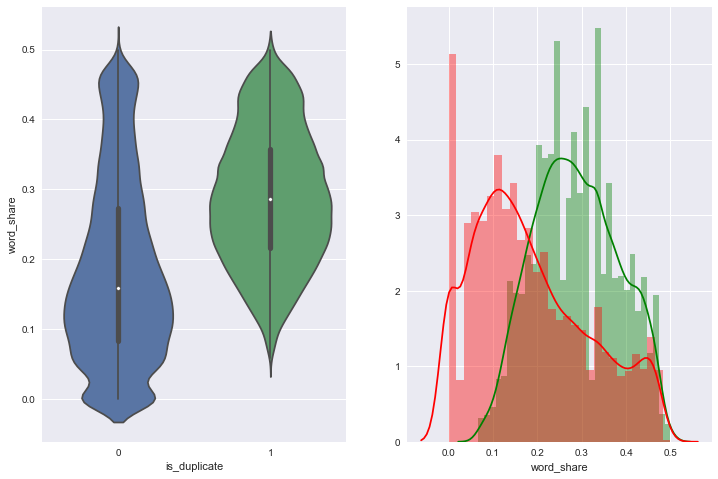

In [21]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:50000])
plt.subplot(1,2,2)
#green color plot shows word_share count for duplicate questions
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:10000], color = 'green')
#red color plot shows word_share count for non duplicate questions
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:10000], color = 'red')

In [23]:
#crate a subsample of the data to be used in plot
df_subsampled = df[0:2000]

trace = go.Scatter(
    y = df_subsampled['q2len'].values,
    x = df_subsampled['q1len'].values,
    mode='markers',
    marker=dict(
        size= df_subsampled['word_share'].values * 60,
        color = df_subsampled['is_duplicate'].values,
        colorscale='Portland',
        showscale=True,
        opacity=0.5,
        colorbar = dict(title = 'duplicate')
    ),
    text = np.round(df_subsampled['word_share'].values, decimals=2)
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Scatter plot of character lengths of questions',
    hovermode= 'closest',
        xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Question 2 length',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterWords')

In [25]:
from IPython.display import display, HTML

#calculate average no of words for both Q1 and Q2 combined
df_subsampled['q_n_words_avg'] = np.round((df_subsampled['q1_n_words'] + df_subsampled['q2_n_words'])/2.0).astype(int)

#sample out the columns with average no of words less than 20
df_subsampled = df_subsampled[df_subsampled['q_n_words_avg'] < 20]
df_subsampled.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_n_words,q2_n_words,word_share,q_n_words_avg
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,0.434783,13
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,0.200000,10
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,0.166667,12
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0.000000,10
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,0.100000,10


In [26]:
#get the unique count for the number of words
word_lens = sorted(list(df_subsampled['q_n_words_avg'].unique()))

# make figure
figure = {
    'data': [],
    'layout': {
        'title': 'Scatter plot of char lenghts of Q1 and Q2',
    },
    'frames': []
}

# fill in most of layout
figure['layout']['xaxis'] = {'range': [0, 200], 'title': 'Q1 length'}
figure['layout']['yaxis'] = {
    'range': [0, 200],
    'title': 'Q2 length'
}
figure['layout']['hovermode'] = 'closest'

figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 300, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Avg. number of words in both questions:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

# make data
word_len = word_lens[0]
dff = df_subsampled[df_subsampled['q_n_words_avg'] == word_len]
data_dict = {
    'x': list(dff['q1len']),
    'y': list(dff['q2len']),
    'mode': 'markers',
    'text': list(dff['is_duplicate']),
    'marker': {
        'sizemode': 'area',
        'colorscale': 'Portland',
        'size': dff['word_share'].values * 120,
        'color': dff['is_duplicate'].values,
        'colorbar': dict(title = 'duplicate')
    },
    'name': 'some name'
}
figure['data'].append(data_dict)

# make frames
for word_len in word_lens:
    frame = {'data': [], 'name': str(word_len)}
    dff = df_subsampled[df_subsampled['q_n_words_avg'] == word_len]

    data_dict = {
        'x': list(dff['q1len']),
        'y': list(dff['q2len']),
        'mode': 'markers',
        'text': list(dff['is_duplicate']),
        'marker': {
            'sizemode': 'area',
            'size': dff['word_share'].values * 120,
            'colorscale': 'Portland',
            'color': dff['is_duplicate'].values,
            'colorbar': dict(title = 'duplicate')
        },
        'name': 'some name'
    }
    frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [
        [word_len],
        {
            'frame': {'duration': 300, 'redraw': False},
            'mode': 'immediate',
            'transition': {'duration': 300}
        }
     ],
     'label': word_len,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

    
figure['layout']['sliders'] = [sliders_dict]

py.iplot(figure)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



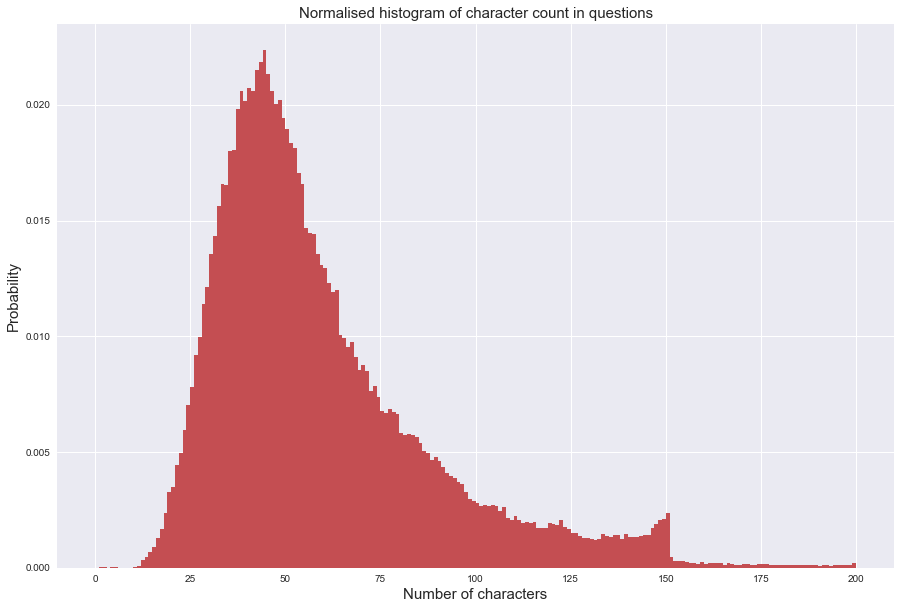

In [10]:
#counting the length of all questions
qs_list_1 = qs_list.apply(len)
#dist_test = test_qs.apply(len)

#plotting histogram based on the length of each questions
pal = sns.color_palette()

plt.figure(figsize=(15, 10))
plt.hist(qs_list_1, bins=200, range=[0, 200], color=pal[2], normed=True)
#plt.hist(dist_test, bins=200, range=[0, 200], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)


In [11]:
#calculating the mean and std deviation analysis of the questions upto two floating point values
#these calculations are based on character count for each question
print('Average number of counts per question {:.2f}'.format(qs_list_1.mean()))
print('Standard deviation of total character count {:.2f}'.format(qs_list_1.std()))

#getting the minimum and maximum count of characters in the questions
print('max number of characters {:.2f}'.format(qs_list_1.max()))


Average number of counts per question 59.82
Standard deviation of total character count 31.96
max number of characters 1169.00


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



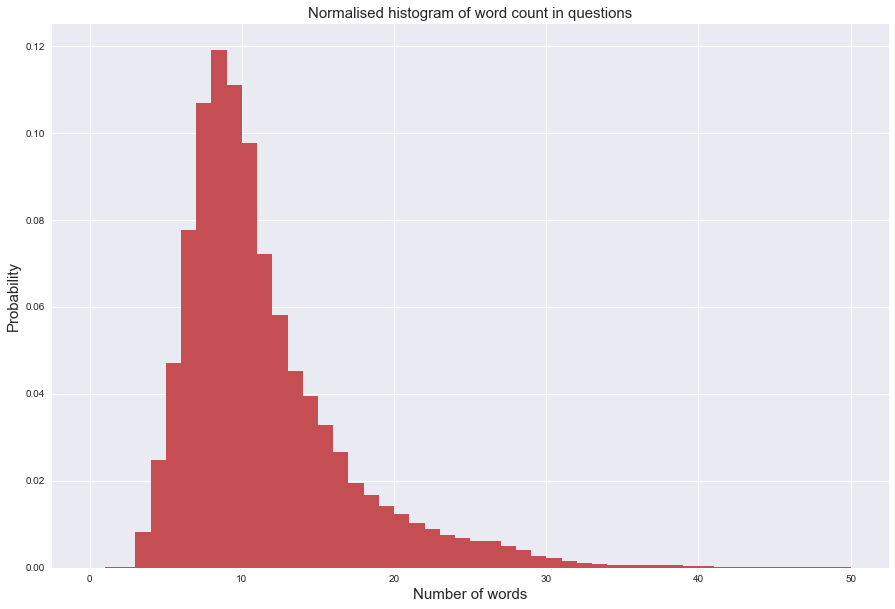

In [12]:
#getting the word count for each words
qs_list_2 = qs_list.apply(lambda x: len(x.split(' ')))

#histogram based on the word counts for each questions
plt.figure(figsize=(15, 10))
plt.hist(qs_list_2, bins=50, range=[0, 50], color=pal[2], normed=True)
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)


In [13]:
#calculating the mean and std deviation analysis of the questions upto two floating point values
#these calculations are based on character count for each question
print('Average number of counts per question {:.2f}'.format(qs_list_2.mean()))
print('Standard deviation of total character count {:.2f}'.format(qs_list_2.std()))

#getting the minimum and maximum count of characters in the questions
print('max number of characters {:.2f}'.format(qs_list_2.max()))

Average number of counts per question 11.06
Standard deviation of total character count 5.89
max number of characters 237.00


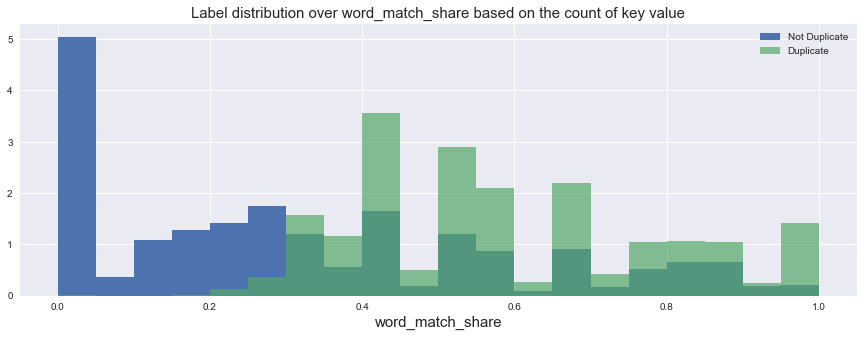

In [14]:
#calculating word matcg between Question1 and Question2
from nltk.corpus import stopwords

#importing stop words from NLTK to remove all stop words from Questions
stops = set(stopwords.words("english"))

def word_match_share(row):
    q1words = {}
    q2words = {}
    
    #spliting each questions into words
    for word in str(row['question1']).lower().split():
        #check if the word does not belong to stop words
        if word not in stops:
            #add the word to the dictionary and assign count to 1
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
            
    #if the list has 0 value then ignore as there are a few questions that are nothing but stopwords      
    if len(q1words) == 0 or len(q2words) == 0:
        return 0
    #get the count of common words in both the dictionaries
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    
    #Getting the average count of common words in both dictionaries
    #the value of R will always be less than 1 as the total of common words cannot exceed the total count of words
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R

#plot the values obtained from the function to check common words between Question1 and Question2
plt.figure(figsize=(15, 5))
word_match = df.apply(word_match_share, axis=1, raw=True)
plt.hist(word_match[df['is_duplicate'] == 0], bins=20, normed=True, label='Not Duplicate')
plt.hist(word_match[df['is_duplicate'] == 1], bins=20, normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over word_match_share based on the count of key value', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

In [15]:
from collections import Counter

# If a word appears only once, we ignore it completely (likely a typo)
#and we are ignoring words with characters lesser than 2 like (is,in etc)
#calculating weight of each word (weight is measured by 1/ number of times the word has been used)
def get_weight(count, min_count=2):
    if count < min_count:
        return 0
    else:
        return 1 / (count)

#extract the words from the questions and convert them to lowercase    
words = (" ".join(qs_list)).lower().split()
#get a count of all the words
counts = Counter(words)
#get the weight for each words using the function defined above
weights = {word: get_weight(count) for word, count in counts.items()}

In [16]:
print('Most common words and weights: \n')

#getting the sorted key, value pairs in tuples
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 1)[:10])

print('\nLeast common words and weights: ')
(sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])

#the smaller value of weight is because of the 1/count values. Hence the more the count, the smaller the weight

Most common words and weights: 

[('the', 2.657757862312196e-06), ('what', 3.2153513735981068e-06), ('is', 3.71855036032753e-06), ('how', 4.565105248501505e-06), ('i', 4.689705627177782e-06), ('a', 4.7564461736768755e-06), ('to', 4.899919151334003e-06), ('in', 5.134867289354907e-06), ('of', 6.291642810854342e-06), ('do', 6.461492734051421e-06)]

Least common words and weights: 


[('beginners:', 0.5),
 ('4d,', 0.5),
 ('"myriad"?', 0.5),
 ('summly', 0.5),
 ('betters', 0.5),
 ("cao's?", 0.5),
 ('margin.', 0.5),
 ('fights.', 0.5),
 ('japanese-macaque', 0.5),
 ('frown', 0.5)]

In [17]:
#calculating term frequesncy in our questions dataset
#same logic to create the two dictionaries (q1words and q2words) as in the function above, 
#the difference is in calculating the weights this time
def word_match_share_term_freq(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        return 0
    
    #extracting the values for each key if there are words common between the 2 dictionaries
    shared_weights = [weights.get(w, 0) for w in q1words.keys() if w in q2words] + [weights.get(w, 0) for w in q2words.keys() if w in q1words]
    total_weights = [weights.get(w, 0) for w in q1words] + [weights.get(w, 0) for w in q2words]
    
    R = np.sum(shared_weights) / np.sum(total_weights)
    return R
    #the values of R will be between 0-1

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:20: RuntimeWarning:

invalid value encountered in double_scalars



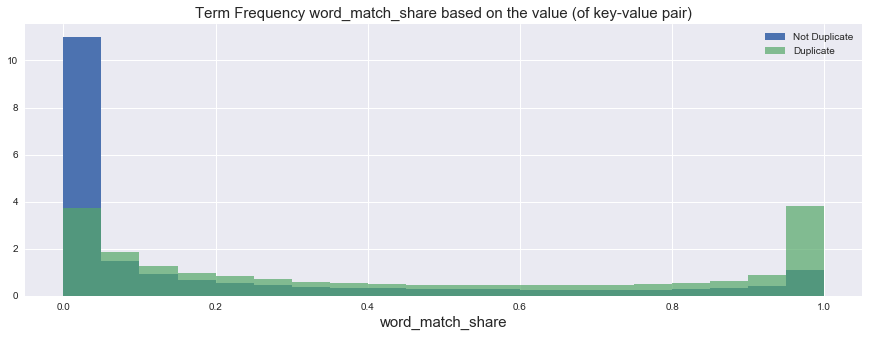

In [18]:
# Offsetting the warning
pd.options.mode.chained_assignment = None

#plotting the count of words based on their keys while achieving term frequency distribution
plt.figure(figsize=(15, 5))
train_word_match = df.apply(word_match_share_term_freq, axis=1, raw=True)

#blue colored plot showing the distribution common words in non duplicate questions
plt.hist(train_word_match[df['is_duplicate'] == 0].fillna(0), bins=20, normed=True, label='Not Duplicate')
#green colored plot showing the distribution common words in duplicate questions
plt.hist(train_word_match[df['is_duplicate'] == 1].fillna(0), bins=20, normed=True, alpha=0.7, label='Duplicate')

plt.legend()
plt.title('Term Frequency word_match_share based on the value (of key-value pair)', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)